# Sentiment Analysis of Consumer Reviews for FMCG Company Products:
## Text Analytics Project using Topic modeling, word clouds and sentiment score

### for Nestle: Maggi

## Import the Libraries

In [1]:
# Importing the pandas library for data manipulation and analysis
import pandas as pd
# Importing the seaborn library for data visualization
import seaborn as sns
# Importing the numpy library for numerical computations and array operations
import numpy as np
# Importing the matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Importing the SentimentIntensityAnalyzer class from the nltk.sentiment.vader module for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Importing the WordCloud class, STOPWORDS, ImageColorGenerator from the wordcloud module for generating word clouds
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

# Importing the nltk library for natural language processing
import nltk
# Importing the re module for regular expression operations
import re
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))
import plotly.express as px

c:\users\kvpai\appdata\local\programs\python\python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\kvpai\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\users\kvpai\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Import libraries for topic modeling using LDA

In [9]:
import gensim
# Importing the corpora module from gensim for creating document-term matrices
from gensim import corpora
# for latent Dirichlet allocation (LDA) topic modeling
from gensim.models import LdaModel

## Import the Scraped Data


In [10]:
data = pd.read_csv('datasets/maggi.csv')
data.head(10)

headline  \
0            Cultural food of mountain.   
1                  None tastes the same   
2         A Quick and Flavorful Delight   
3                                  Good   
4                                  Fast   
5                          Good quality   
6               perfect delevery timing   
7                            Very Tasty   
8  Good product and has good reputation   
9                                Meggie   

                                              review              rating  
0  Utilize your 5 minutes to know about your Magg...  4.0 out of 5 stars  
1  Personally it's my favourite, nice deal on Ama...  4.0 out of 5 stars  
2  MAGGI 2-Minute Instant Noodles in the 840g pac...  5.0 out of 5 stars  
3                                               Good  4.0 out of 5 stars  
4             Fast to prepare best for anytime snack  4.0 out of 5 stars  
5          With discount prices best value for money  5.0 out of 5 stars  
6  its Maggie is a fantastic brand that offers a ...  5.0 out of 5 stars  
7         Nice Flavour and very Tasty & easy to cook  5.0 out of 5 stars  
8  The product stands for its reputation. Good fo...  5.0 out of 5 stars  
9                                 Combo bahot acha h  5.0 out of 5 stars

In [11]:
data.isnull().sum()

headline    0
review      8
rating      0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580 entries, 0 to 1579
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  1580 non-null   object
 1   review    1572 non-null   object
 2   rating    1580 non-null   object
dtypes: object(3)
memory usage: 37.2+ KB


## Dropping rows which have null values

In [13]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1572 entries, 0 to 1579
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  1572 non-null   object
 1   review    1572 non-null   object
 2   rating    1572 non-null   object
dtypes: object(3)
memory usage: 49.1+ KB


## This method is for cleaning the data. That is stemming and removing stopwords 

In [14]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
#     text = [stemmer.stem(word) for word in text.split(' ')]
#     text=" ".join(text)
    return text
data["review"] = data["review"].apply(clean)

## Spiltting reviews to get keywords for our topic modeling

In [15]:
texts = data["review"]
split_text = [d.split() for d in texts]

In [16]:
dictionary = corpora.Dictionary(split_text)
# filter out words that occur in < 20 reviews, or > 80% of the reviews
dictionary.filter_extremes(no_below = 20, no_above = .8)

# creat corpus: pairing of word id and word frequency in each document

In [17]:
corpus = [dictionary.doc2bow(text) for text in split_text] 

In [18]:
lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus, id2word = dictionary, num_topics = 8, passes = 20)

In [19]:
### Latent Dirichlet Allocation algorithm for topic modeling

In [20]:
topics = lda_model.print_topics(num_words = 10)
# for topic in topics:  
#     print(topic)

## List of latent (hidden) topics and their top 11 keywords

In [21]:
for i, topic in lda_model.show_topics(formatted=False, num_words= 11):
    print('Topic: {} \nWords: {}'.format(i, [w[0] for w in topic]), end = "\n"+"-"*120+"\n")

Topic: 0 
Words: ['maggi', 'noodles', 'packing', 'one', 'pack', 'eat', 'go', 'excellent', 'like', 'time', 'also']
------------------------------------------------------------------------------------------------------------------------
Topic: 1 
Words: ['nice', 'like', 'amazon', 'yummy', 'flavor', 'maggi', 'product', 'better', 'delivery', 'maggie', 'value']
------------------------------------------------------------------------------------------------------------------------
Topic: 2 
Words: ['quality', 'tasty', 'product', 'date', 'got', 'buy', 'market', 'amazon', 'delivery', 'flavour', 'price']
------------------------------------------------------------------------------------------------------------------------
Topic: 3 
Words: ['good', 'price', 'packaging', 'product', 'buy', 'time', 'make', 'packing', 'amazon', 'pack', 'taste']
------------------------------------------------------------------------------------------------------------------------
Topic: 4 
Words: ['maggie', 'best',

## Analysis of the ratings

In [22]:
data['rating'] = data['rating'].str.split().str[0].astype(float)

In [23]:
data.head()

headline  \
0     Cultural food of mountain.   
1           None tastes the same   
2  A Quick and Flavorful Delight   
3                           Good   
4                           Fast   

                                              review  rating  
0  utilize  minutes know maggiwe cannot ignore fa...     4.0  
1              personally favourite nice deal amazon     4.0  
2  maggi  instant noodles  pack containing  pouch...     5.0  
3                                               good     4.0  
4                    fast prepare best anytime snack     4.0

In [24]:
ratings = data["rating"].value_counts()
numbers = ratings.index
labels = []
for i in numbers:
    labels.append(str(int(i))+ " star rating")

In [25]:
quantity = ratings.values

figure = px.pie(data, 
             values=quantity, 
             names=labels,
             title='Customer ratings out of 5',
             hole= 0.4)
figure.show()

## Interpetation of the distribution:
The customer ratings data shows that the majority of customers were highly satisfied, with a significant number of five-star ratings. However, there were also a notable number of customers who expressed average or below-average satisfaction levels. This indicates room for improvement to address customer concerns and enhance overall satisfaction

## WordCloud for the Reviews

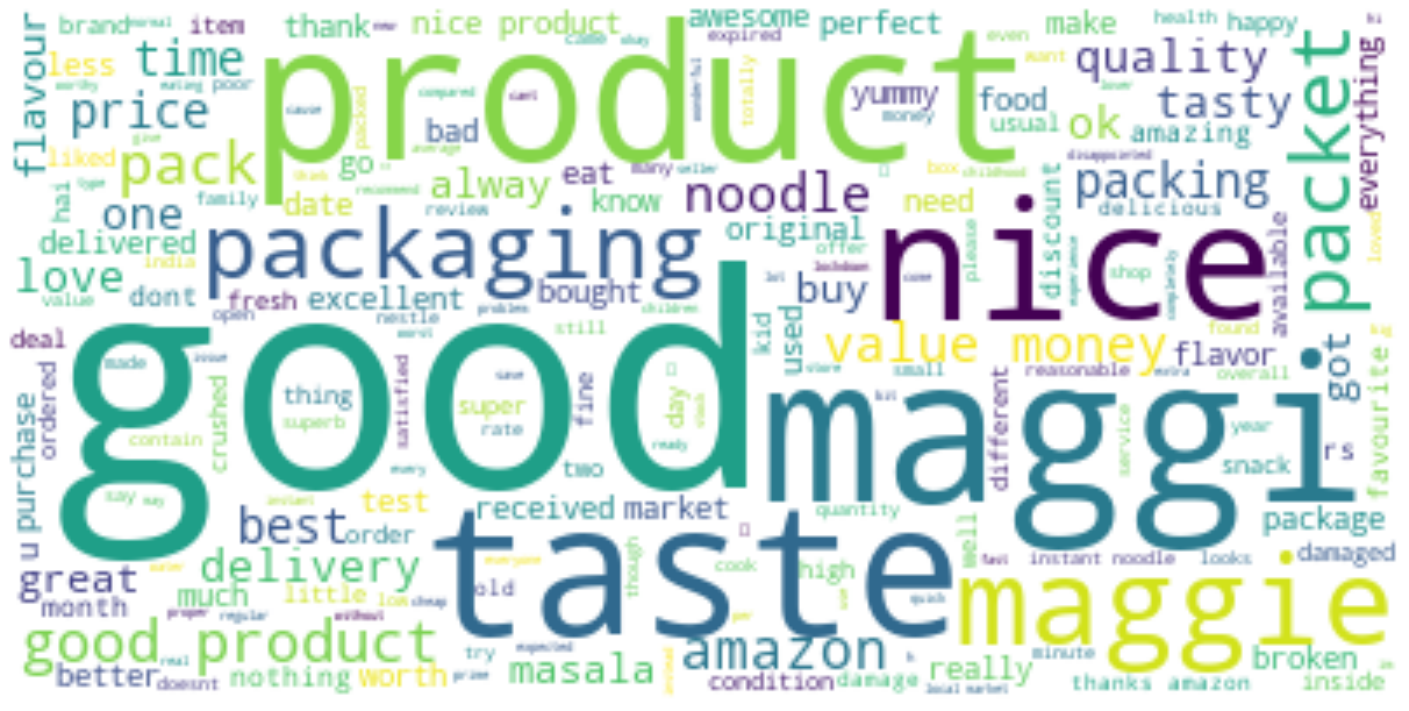

In [26]:
text = " ".join(i for i in data.review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.figure( figsize=(25,25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## The above word cloud illustrates the keywords in the reviews
Note the presence of predominantly positive words

## Calculating the Sentiment Scores

In [27]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kvpai\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [28]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["review"]]
data = data[["review", "Positive", "Negative", "Neutral"]]
data.head()

review  Positive  Negative  \
0  utilize  minutes know maggiwe cannot ignore fa...     0.129     0.109   
1              personally favourite nice deal amazon     0.600     0.000   
2  maggi  instant noodles  pack containing  pouch...     0.279     0.000   
3                                               good     1.000     0.000   
4                    fast prepare best anytime snack     0.512     0.000   

   Neutral  
0    0.762  
1    0.400  
2    0.721  
3    0.000  
4    0.488

## Interpretation of the polarity scores:
The interpretation of the polarity/sentiment scores reveals the overall sentiment expressed in the customer reviews, ranging from positive to negative.

In [29]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Overall Positive")
    elif (b>a) and (b>c):
        print("Overall Negative")
    else:
        print("Overall Neutral")
sentiment_score(x, y, z)

Overall Positive


In [30]:
sentiment_percent = [['Positive', round(x/len(data)*100, 3)],
                     ['Negative', round(y/len(data)*100, 3)],
                     ['Neurtal', round(z/len(data)*100, 3)]]
sentiment_res = pd.DataFrame(sentiment_percent, columns=['Sentiment', 'Percentage'])
sentiment_res

Sentiment  Percentage
0  Positive      56.563
1  Negative       3.791
2   Neurtal      38.692

## Create a new dataframe
create a new dataframe with customers who had a bad experience with this product.

In [31]:
data_neg = data[(data['Negative']>data['Positive']) & (data['Negative']>data['Neutral'])]

In [35]:
data_neg.head(20)

review  Positive  Negative  \
26                                           low price     0.000     0.677   
64                                          complaints     0.000     1.000   
119                           make easily time wasting     0.338     0.380   
142                            minute nahi ban paayi 🥲     0.000     0.545   
144  smell completely worst taste bad like real mag...     0.122     0.536   
165                                   very bad product     0.000     0.655   
214                                                bad     0.000     1.000   
350                                         poor taste     0.000     0.756   
429  came nice box  though noodles broken bad  over...     0.292     0.371   
433                maggie crushed verry bad experience     0.000     0.677   
437                        like product packaging poor     0.329     0.408   
476                                             demand     0.000     1.000   
494                           unhappy discount product     0.000     0.583   
507  maggie never disappoints received good manner ...     0.130     0.453   
509                                              worst     0.000     1.000   
526                maggi packets broken packaging good     0.322     0.344   
531  complaints producti disappointed delivery  pac...     0.000     0.568   
536                  packaging poor overall product ok     0.265     0.373   
548                            pack broken powder form     0.000     0.508   
638   problem maggi came broken inside everything fine     0.155     0.500   

     Neutral  
26     0.323  
64     0.000  
119    0.282  
142    0.455  
144    0.342  
165    0.345  
214    0.000  
350    0.244  
429    0.337  
433    0.323  
437    0.263  
476    0.000  
494    0.417  
507    0.417  
509    0.000  
526    0.333  
531    0.432  
536    0.361  
548    0.492  
638    0.345

create a new dataframe with customers who had a good experience with this product.

In [36]:
data_pos = data[(data['Positive']>data['Negative']) & (data['Positive']>data['Neutral'])]
data_pos.head()

review  Positive  Negative  Neutral
1  personally favourite nice deal amazon     0.600       0.0    0.400
3                                   good     1.000       0.0    0.000
4        fast prepare best anytime snack     0.512       0.0    0.488
5       discount prices best value money     0.688       0.0    0.312
7          nice flavour tasty  easy cook     0.655       0.0    0.345

## Word Cloud: Negative Sentiments in Customer Reviews
This word cloud is created using words extracted from customer reviews with negative sentiment, providing a visual representation of the frequently occurring negative words and phrases. 

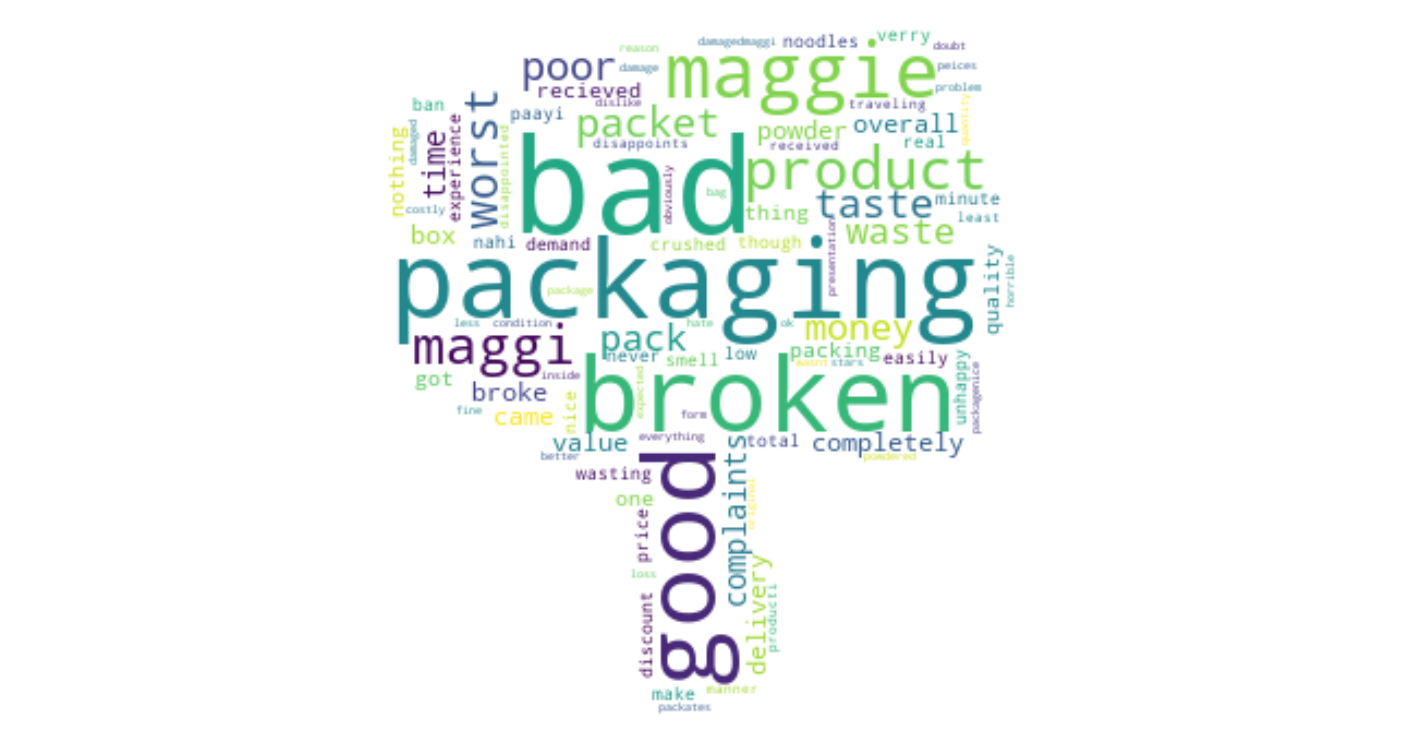

In [37]:
text = " ".join(i for i in data_neg.review)
stopwords = set(STOPWORDS)
mask = np.array(Image.open("assets/thumbs-down.jpg"))
wordcloud = WordCloud(stopwords=stopwords, background_color="white", mask = mask, max_words=250).generate(text)
plt.figure( figsize=(25,25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Word Cloud: Positive Sentiments in Customer Reviews
This word cloud is generated by extracting words from customer reviews with positive sentiment, offering a visual representation of the frequently occurring positive words and phrases.. 

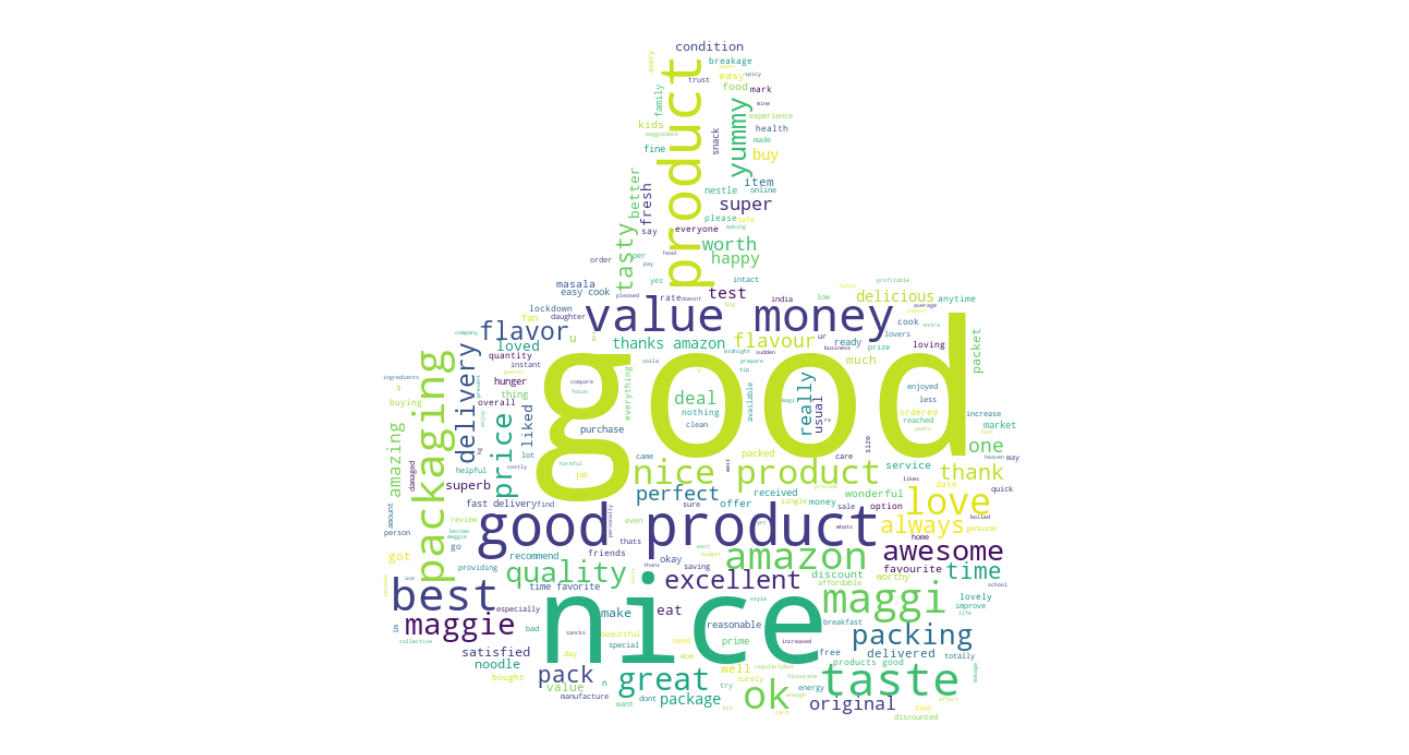

In [39]:
text = " ".join(i for i in data_pos.review)
stopwords = set(STOPWORDS)

mask = np.array(Image.open("assets/thumbs-up.jpg"))

wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=250, mask=mask).generate(text)
plt.figure(figsize=(25,25))
# plt.imshow(wordcloud, interpolation='bilinear')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In conclusion, this Python notebook focused on analyzing customer ratings and sentiments. The data provided valuable insights into customer satisfaction levels, with a majority of customers giving positive ratings. The word cloud visualizations further highlighted the predominant positive or negative sentiments expressed in customer reviews. By understanding the sentiment polarity and analyzing the frequently occurring words, businesses can gain deeper insights into customer experiences and identify areas for improvement. This analysis serves as a valuable tool for enhancing customer satisfaction, making data-driven decisions, and refining products or services based on customer feedback.
